<a href="https://colab.research.google.com/github/Francisco-Dougllas/03_SQL_Data_Science/blob/main/2_2_Python_Com_SQL_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQL & PANDAS II

**Importaçao das Bibliotecas necessarias**

### Dicionario dos Dados

- Category: Cetegoria
- Customers: Clientes
- Geolocation: Geolocalização
- Order items: Itens de Ordem
- Order reviews: Revisões de Pedidos
- Orders: Pedidos
- Payments: Pagamentos
- Produtcts: Produtos



In [ ]:
dicionario = ('''- 
Category: Cetegoria
- Customers: Clientes
- Geolocation: Geolocalização
- Order items: Itens de Ordem
- Order reviews: Revisões de Pedidos
- Orders: Pedidos
- Payments: Pagamentos
- Produtcts: Produtos''')

In [ ]:
import pandas as pd
import numpy as np
import sqlite3

**Banco de Dados SQL com Python**

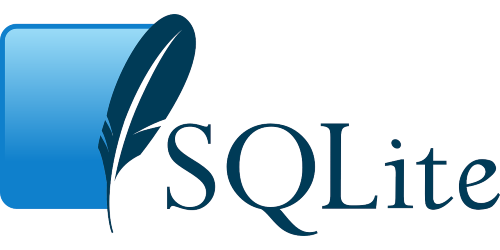

In [ ]:
from IPython.display import Image
Image('dados/sql.png')

**Carregando a Extensão SQLite**

In [ ]:
%load_ext sql

**Definindo o Banco de Dados a ser utilizado, iremos utiliza o banco de dados utilizado no primeiro Notebook**

In [ ]:
%sql sqlite:///olist.db

### **Pronto agora podemos fazer as consultas utilizando o SQL no Pandas**

### Trabalhando com Junções - Entendendo o INNER JOINS


In [ ]:
print(dicionario)

- 
Category: Cetegoria
- Customers: Clientes
- Geolocation: Geolocalização
- Order items: Itens de Ordem
- Order reviews: Revisões de Pedidos
- Orders: Pedidos
- Payments: Pagamentos
- Produtcts: Produtos


**<font color='blue'>Selecionando dados das tabelas pedidos, pagamentos e items**

In [ ]:
%%sql

-- 4.1 - SELECIONANDO DADOS DAS TABELAS DE PEDIDOS, PAGAMENTOS E ITENS

SELECT PEDIDOS.ORDER_ID                         AS ID_PEDIDO
    ,PRODUTOS.PRODUCT_ID                        AS ID_PRODUTO
    ,PRODUTOS.PRODUCT_CATEGORY_NAME AS CATEGORIA_PRODUTO
    ,PRODUTOS.PRODUCT_PHOTOS_QTY AS QTD_FOTOS_PRODUTO
    ,ITENS.PRICE AS PREÇO
    ,PAGAMENTOS.PAYMENT_TYPE AS TIPO_PAGAMENTO
    ,PAGAMENTOS.PAYMENT_VALUE AS VALOR_PAGAMENTO

    
FROM ORDER_ITEMS ITENS INNER JOIN PRODUCTS PRODUTOS
ON ITENS.PRODUCT_ID = PRODUTOS.PRODUCT_ID

INNER JOIN ORDERS PEDIDOS
ON PEDIDOS.ORDER_ID = ITENS.ORDER_ID

INNER JOIN ORDER_PAYMENTS PAGAMENTOS
ON PAGAMENTOS.ORDER_ID = PEDIDOS.ORDER_ID

WHERE PRODUTOS.PRODUCT_PHOTOS_QTY > 1


LIMIT 10
        

 * sqlite:///olist.db
Done.


ID_PEDIDO,ID_PRODUTO,CATEGORIA_PRODUTO,QTD_FOTOS_PRODUTO,PREÇO,TIPO_PAGAMENTO,VALOR_PAGAMENTO
86cafb8794cb99a9b1b77fc8e48fbbbb,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4,37.90,credit_card,46.19
9632facd8bd95315d63a23bf616d85b0,732bd381ad09e530fe0a5f457d81becb,cool_stuff,4,958.00,credit_card,985.76
c6343db6c1801f9c3301166f02931116,732bd381ad09e530fe0a5f457d81becb,cool_stuff,4,968.00,credit_card,1012.30
6ecf7023e8dd4ec8b08746c35b9fcb60,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,2,9.99,credit_card,163.88
6ecf7023e8dd4ec8b08746c35b9fcb60,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,2,9.99,credit_card,163.88
8ac5b235603eee2e21e36261b2df536c,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,2,9.99,credit_card,82.55
8ac5b235603eee2e21e36261b2df536c,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,2,9.99,voucher,34.11
8ac5b235603eee2e21e36261b2df536c,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,2,9.99,credit_card,82.55
8ac5b235603eee2e21e36261b2df536c,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,2,9.99,voucher,34.11
c5874d438cf199ea7c0f27967f6cf462,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,2,9.99,credit_card,120.35


**<font color='blue'>Seleciona Dados Das Tabelas de Pedidos, Pagamentos, Produtos, Pedidos e Geolocation onde Pedidos sejam maior que 10**

In [ ]:
%%sql

SELECT pedidos.order_id              AS 'Id do Pedido'
    ,produtos.product_id             AS 'Id do Produto'
    ,produtos.product_category_name  AS 'Categoria do Produto'
    ,produtos.product_photos_qty     AS 'Quantidade de Fotos'
    ,itens.price                     AS 'Preco'
    ,pagamentos.payment_type         AS 'Tipo de Pagamento'
    ,pagamentos.payment_value        AS 'Valor do Pagamento'
    
FROM order_items itens INNER JOIN products produtos
ON itens.product_id = produtos.product_id

INNER JOIN orders pedidos
ON pedidos.order_id = itens.order_id

INNER JOIN order_payments pagamentos
ON pagamentos.order_id = pedidos.order_id

WHERE produtos.product_photos_qty >= 10

LIMIT 10

 * sqlite:///olist.db
Done.


Id do Pedido,Id do Produto,Categoria do Produto,Quantidade de Fotos,Preco,Tipo de Pagamento,Valor do Pagamento
86cafb8794cb99a9b1b77fc8e48fbbbb,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4,37.90,credit_card,46.19
9632facd8bd95315d63a23bf616d85b0,732bd381ad09e530fe0a5f457d81becb,cool_stuff,4,958.00,credit_card,985.76
c6343db6c1801f9c3301166f02931116,732bd381ad09e530fe0a5f457d81becb,cool_stuff,4,968.00,credit_card,1012.30
6ecf7023e8dd4ec8b08746c35b9fcb60,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,2,9.99,credit_card,163.88
6ecf7023e8dd4ec8b08746c35b9fcb60,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,2,9.99,credit_card,163.88
8ac5b235603eee2e21e36261b2df536c,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,2,9.99,credit_card,82.55
8ac5b235603eee2e21e36261b2df536c,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,2,9.99,voucher,34.11
8ac5b235603eee2e21e36261b2df536c,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,2,9.99,credit_card,82.55
8ac5b235603eee2e21e36261b2df536c,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,2,9.99,voucher,34.11
c5874d438cf199ea7c0f27967f6cf462,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,2,9.99,credit_card,120.35


**<font color='blue'>Selecione os pedidos se houver pedidos na tabela pedidos mas não necessariamente na tabela clientes**

In [ ]:
%%sql

SELECT order_id
    ,pedido.order_status
    ,clientes.customer_id
    ,clientes.customer_city
    ,clientes.customer_state
    
FROM orders pedido LEFT JOIN customers clientes
ON pedido.customer_id = clientes.customer_id

LIMIT 10

 * sqlite:///olist.db
Done.


order_id,order_status,customer_id,customer_city,customer_state
e481f51cbdc54678b7cc49136f2d6af7,delivered,9ef432eb6251297304e76186b10a928d,sao paulo,SP
53cdb2fc8bc7dce0b6741e2150273451,delivered,b0830fb4747a6c6d20dea0b8c802d7ef,barreiras,BA
47770eb9100c2d0c44946d9cf07ec65d,delivered,41ce2a54c0b03bf3443c3d931a367089,vianopolis,GO
949d5b44dbf5de918fe9c16f97b45f8a,delivered,f88197465ea7920adcdbec7375364d82,sao goncalo do amarante,RN
ad21c59c0840e6cb83a9ceb5573f8159,delivered,8ab97904e6daea8866dbdbc4fb7aad2c,santo andre,SP
a4591c265e18cb1dcee52889e2d8acc3,delivered,503740e9ca751ccdda7ba28e9ab8f608,congonhinhas,PR
136cce7faa42fdb2cefd53fdc79a6098,invoiced,ed0271e0b7da060a393796590e7b737a,santa rosa,RS
6514b8ad8028c9f2cc2374ded245783f,delivered,9bdf08b4b3b52b5526ff42d37d47f222,nilopolis,RJ
76c6e866289321a7c93b82b54852dc33,delivered,f54a9f0e6b351c431402b8461ea51999,faxinalzinho,RS
e69bfb5eb88e0ed6a785585b27e16dbf,delivered,31ad1d1b63eb9962463f764d4e6e0c9d,sorocaba,SP


**<font color='blue'>Selecione os pedidos se houver na tabela clientes mas não na tabela pedidos**

In [ ]:
%%sql

-- RIGHT JOIN

SELECT order_id
    ,pedido.order_status
    ,clientes.customer_id
    ,clientes.customer_city
    ,clientes.customer_state
    
FROM orders pedido RIGHT JOIN customers clientes
ON pedido.customer_id = clientes.customer_id

LIMIT 15

 * sqlite:///olist.db
Done.


order_id,order_status,customer_id,customer_city,customer_state
e481f51cbdc54678b7cc49136f2d6af7,delivered,9ef432eb6251297304e76186b10a928d,sao paulo,SP
53cdb2fc8bc7dce0b6741e2150273451,delivered,b0830fb4747a6c6d20dea0b8c802d7ef,barreiras,BA
47770eb9100c2d0c44946d9cf07ec65d,delivered,41ce2a54c0b03bf3443c3d931a367089,vianopolis,GO
949d5b44dbf5de918fe9c16f97b45f8a,delivered,f88197465ea7920adcdbec7375364d82,sao goncalo do amarante,RN
ad21c59c0840e6cb83a9ceb5573f8159,delivered,8ab97904e6daea8866dbdbc4fb7aad2c,santo andre,SP
a4591c265e18cb1dcee52889e2d8acc3,delivered,503740e9ca751ccdda7ba28e9ab8f608,congonhinhas,PR
136cce7faa42fdb2cefd53fdc79a6098,invoiced,ed0271e0b7da060a393796590e7b737a,santa rosa,RS
6514b8ad8028c9f2cc2374ded245783f,delivered,9bdf08b4b3b52b5526ff42d37d47f222,nilopolis,RJ
76c6e866289321a7c93b82b54852dc33,delivered,f54a9f0e6b351c431402b8461ea51999,faxinalzinho,RS
e69bfb5eb88e0ed6a785585b27e16dbf,delivered,31ad1d1b63eb9962463f764d4e6e0c9d,sorocaba,SP


## Utilizando Funções Uteis no SGBD

In [ ]:
%%sql

-- FUNCAO RANDOM()

SELECT RANDOM() AS 'RANDOM'

 * sqlite:///olist.db
Done.


RANDOM
236098944071329315


In [ ]:
%%sql

-- FUNCAO UPPER

SELECT UPPER(product_category_name)

FROM products

LIMIT 12

 * sqlite:///olist.db
Done.


UPPER(product_category_name)
PERFUMARIA
ARTES
ESPORTE_LAZER
BEBES
UTILIDADES_DOMESTICAS
INSTRUMENTOS_MUSICAIS
COOL_STUFF
MOVEIS_DECORACAO
ELETRODOMESTICOS
BRINQUEDOS


In [ ]:
%%sql

-- FUNCAO LOWER

SELECT LOWER(PRODUCT_CATEGORY_NAME) 
FROM PRODUCTS
LIMIT 12

 * sqlite:///olist.db
Done.


LOWER(PRODUCT_CATEGORY_NAME)
perfumaria
artes
esporte_lazer
bebes
utilidades_domesticas
instrumentos_musicais
cool_stuff
moveis_decoracao
eletrodomesticos
brinquedos


In [ ]:
%%sql

-- FUNCAO LENGTH

SELECT LENGTH(product_category_name)
FROM products
LIMIT 10

 * sqlite:///olist.db
Done.


LENGTH(product_category_name)
10
5
13
5
21
21
10
16
16
10


In [ ]:
%%sql

-- FUNCAO PRAGMA

PRAGMA TABLE_INFO(ORDER_ITEMS)

 * sqlite:///olist.db
Done.


cid,name,type,notnull,dflt_value,pk
0,order_id,TEXT,0,None,0
1,order_item_id,TEXT,0,None,0
2,product_id,TEXT,0,None,0
3,seller_id,TEXT,0,None,0
4,shipping_limit_date,TEXT,0,None,0
5,price,TEXT,0,None,0
6,freight_value,TEXT,0,None,0


In [ ]:
%%sql

-- FUNCAO CAST
-- ENTENDENDO A APLICABILIDADE DA FUNCAO

SELECE price
FORM order_items
WHERE price > 10
LIMIT 10

-- Perceba que dessa forma não funcionara nesse caso devemos utiliza a FUNCAO CAST

 * sqlite:///olist.db
(sqlite3.OperationalError) near "SELECE": syntax error
[SQL: -- FUNCAO CAST
-- ENTENDENDO A APLICABILIDADE DA FUNCAO

SELECE price
FORM order_items
WHERE price > 10
LIMIT 10

-- Perceba que dessa forma não funcionara nesse caso devemos utiliza a FUNCAO CAST]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [ ]:
%%sql

-- Convertendo o Valor da coluna price

SELECT CAST(PRICE AS INT) AS PRICE
FROM ORDER_ITEMS
WHERE CAST(PRICE AS INT) > 100

LIMIT 10

 * sqlite:///olist.db
Done.


PRICE
239
199
199
810
145
639
144
119
219
289


**<font color='blue'>Selecione dados das tabelas pedidos, pagamentos e itens**

In [ ]:
%%sql

SELECT pedidos.order_id
    ,produtos.product_id
    ,produtos.product_category_name
    ,produtos.product_photos_qty
    ,itens.price
    ,pagamentos.payment_type
    ,pagamentos.payment_value
    
FROM order_items itens INNER JOIN products produtos
ON itens.product_id = produtos.product_id

INNER JOIN orders pedidos
ON pedidos.order_id = itens.order_id

INNER JOIN order_payments pagamentos
ON pagamentos.order_id = pedidos.order_id

WHERE CAST(itens.price AS INT) > 100
LIMIT 15

 * sqlite:///olist.db
Done.


order_id,product_id,product_category_name,product_photos_qty,price,payment_type,payment_value
00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,2,239.90,credit_card,259.83
000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,2,199.00,credit_card,216.87
00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,1,199.90,credit_card,218.04
000576fe39319847cbb9d288c5617fa6,557d850972a7d6f792fd18ae1400d9b6,ferramentas_jardim,3,810.00,credit_card,880.75
0005a1a1728c9d785b8e2b08b904576c,310ae3c140ff94b03219ad0adc3c778f,beleza_saude,1,145.95,credit_card,157.60
0009c9a17f916a706d71784483a5d643,3f27ac8e699df3d300ec4a5d8c5cf0b2,consoles_games,2,639.00,credit_card,650.34
000aed2e25dbad2f9ddb70584c5a2ded,4fa33915031a8cde03dd0d3e8fb27f01,perfumaria,1,144.00,credit_card,152.77
000f25f4d72195062c040b12dce9a18a,1c05e0964302b6cf68ca0d15f326c6ba,moveis_escritorio,1,119.99,credit_card,164.39
00119ff934e539cf26f92b9ef0cdfed8,21b1c2f67a9aafb5af0eb06c13b9dbda,esporte_lazer,8,219.90,credit_card,236.88
0011d82c4b53e22e84023405fb467e57,c389f712c4b4510bc997cee93e8b1a28,malas_acessorios,1,289.00,credit_card,315.33


**<font color='blue'>Selecione os pedidos se houver pedidos na tabela pedidos mas não na tabela clientes**

In [ ]:
%%sql

-- LEFT JOIN

SELECT order_id
    ,pedido.order_status
    ,clientes.customer_id
    ,clientes.customer_city
    ,clientes.customer_state
    
FROM orders pedido LEFT JOIN customers clientes
ON pedido.customer_id = clientes.customer_id

LIMIT 10

 * sqlite:///olist.db
Done.


order_id,order_status,customer_id,customer_city,customer_state
e481f51cbdc54678b7cc49136f2d6af7,delivered,9ef432eb6251297304e76186b10a928d,sao paulo,SP
53cdb2fc8bc7dce0b6741e2150273451,delivered,b0830fb4747a6c6d20dea0b8c802d7ef,barreiras,BA
47770eb9100c2d0c44946d9cf07ec65d,delivered,41ce2a54c0b03bf3443c3d931a367089,vianopolis,GO
949d5b44dbf5de918fe9c16f97b45f8a,delivered,f88197465ea7920adcdbec7375364d82,sao goncalo do amarante,RN
ad21c59c0840e6cb83a9ceb5573f8159,delivered,8ab97904e6daea8866dbdbc4fb7aad2c,santo andre,SP
a4591c265e18cb1dcee52889e2d8acc3,delivered,503740e9ca751ccdda7ba28e9ab8f608,congonhinhas,PR
136cce7faa42fdb2cefd53fdc79a6098,invoiced,ed0271e0b7da060a393796590e7b737a,santa rosa,RS
6514b8ad8028c9f2cc2374ded245783f,delivered,9bdf08b4b3b52b5526ff42d37d47f222,nilopolis,RJ
76c6e866289321a7c93b82b54852dc33,delivered,f54a9f0e6b351c431402b8461ea51999,faxinalzinho,RS
e69bfb5eb88e0ed6a785585b27e16dbf,delivered,31ad1d1b63eb9962463f764d4e6e0c9d,sorocaba,SP


**<font color='blue'>Selecione os pedidos se houver registros mas não na tabela pedidos**

In [ ]:
%%sql

-- FULL JOIN

SELECT ORDER_ID
    ,PEDIDO.ORDER_STATUS
    ,CLIENTE.CUSTOMER_ID
    ,CLIENTE.CUSTOMER_CITY
    ,CLIENTE.CUSTOMER_STATE
    
FROM ORDERS PEDIDO full JOIN CUSTOMERS CLIENTE

LIMIT 10

 * sqlite:///olist.db
Done.


order_id,order_status,customer_id,customer_city,customer_state
e481f51cbdc54678b7cc49136f2d6af7,delivered,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
e481f51cbdc54678b7cc49136f2d6af7,delivered,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
e481f51cbdc54678b7cc49136f2d6af7,delivered,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
e481f51cbdc54678b7cc49136f2d6af7,delivered,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
e481f51cbdc54678b7cc49136f2d6af7,delivered,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP
e481f51cbdc54678b7cc49136f2d6af7,delivered,879864dab9bc3047522c92c82e1212b8,jaragua do sul,SC
e481f51cbdc54678b7cc49136f2d6af7,delivered,fd826e7cf63160e536e0908c76c3f441,sao paulo,SP
e481f51cbdc54678b7cc49136f2d6af7,delivered,5e274e7a0c3809e14aba7ad5aae0d407,timoteo,MG
e481f51cbdc54678b7cc49136f2d6af7,delivered,5adf08e34b2e993982a47070956c5c65,curitiba,PR
e481f51cbdc54678b7cc49136f2d6af7,delivered,4b7139f34592b3a31687243a302fa75b,belo horizonte,MG


**Consulta todos os produtos da tabela produtos ond o preco dos itens for mairo que 50**

In [ ]:
%%sql

-- SUBQUERIES

SELECT *
FROM products
    WHERE product_id = (SELECT product_id
                       FROM order_items
                       WHERE CAST(price AS INT) > 500)
    
-- Perceba que se eu utiliza apenas dessa forma, ira mim retorna apenas um valor

 * sqlite:///olist.db
Done.


product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
557d850972a7d6f792fd18ae1400d9b6,ferramentas_jardim,39,1310,3,13805,35,75,45


**Utilizando o Operados IN**

In [ ]:
%%sql

-- USANDO O OPERADOR IN

SELECT *
FROM PRODUCTS
    WHERE PRODUCT_ID IN(SELECT PRODUCT_ID
                       FROM ORDER_ITEMS
                       WHERE CAST(PRICE AS INT) > 500)
    
LIMIT 10

-- Utilizando o operador IN ira mim retorna todos os valores

 * sqlite:///olist.db
Done.


product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
732bd381ad09e530fe0a5f457d81becb,cool_stuff,56,1272,4,18350,70,24,44
7a8dac4aaa16bc642e4df33adcf03303,cool_stuff,38,1701,2,11750,18,40,79
5f504b3a1c75b73d6151be81eb05bdc9,cool_stuff,38,1176,3,15350,47,40,47
5eaa343860dc445b3fd43d1b682809fd,esporte_lazer,53,3218,5,4800,60,30,15
1e5428c428e0f783acd6e3d94ba4ee2a,pcs,55,1067,1,12000,27,50,53
c2367eda4f9623d0355dc5d7796d857a,cama_mesa_banho,50,607,1,6450,100,10,11
ce94e3c41145e28428cdae952a1fd7f2,relogios_presentes,58,899,2,335,17,11,12
2bfb0bdbcea77da2879f0ef3be9a219e,consoles_games,53,439,5,900,22,7,18
3cef8174403f4fdedbf24fa67fa9f132,bebes,39,805,3,1800,18,32,27
43b6d9e46e1e6b8ac743a1c31e462937,ferramentas_jardim,31,680,1,7700,39,28,25


## Um Pouco de DML

**<font color='blue'> Criando uma tabela funcionarios**

In [ ]:
%%sql

CREATE TABLE funcionarios(
    ID INT PRIMARY   KEY    NOT NULL,
    NOME             TEXT   NOT NULL,
    IDADE            INT    NOT NULL,
    SEXO             CHAR(1),
    SALARIO          REAL);

 * sqlite:///olist.db
(sqlite3.OperationalError) table funcionarios already exists
[SQL: CREATE TABLE funcionarios(
    ID INT PRIMARY   KEY    NOT NULL,
    NOME             TEXT   NOT NULL,
    IDADE            INT    NOT NULL,
    SEXO             CHAR(1),
    SALARIO          REAL);]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


**<font color='blue'>Consultando a tabela previamente criada**

In [ ]:
%%sql

SELECT *
FROM funcionarios

 * sqlite:///olist.db
Done.


ID,NOME,IDADE,SEXO,SALARIO
3,Norma,57,F,5000.0


**<font color='blue'>Renomeando uma Tabela**

In [ ]:
%%sql

ALTER TABLE funcionarios RENAME TO colaboradores;

 * sqlite:///olist.db
Done.


[]

**<font color='blue'>Consultando a tabela colaboradores**

In [ ]:
%%sql

SELECT *
FROM colaboradores

 * sqlite:///olist.db
Done.


ID,NOME,IDADE,SEXO,SALARIO
3,Norma,57,F,5000.0


**<font color='blue'>Adicionando uma nova coluna na Tabela colaboradores**

In [ ]:
%%sql

ALTER TABLE colaboradores
ADD COLUMN endereco TEXT

 * sqlite:///olist.db
Done.


[]

In [ ]:
%%sql

SELECT *
FROM colaboradores

 * sqlite:///olist.db
Done.


ID,NOME,IDADE,SEXO,SALARIO,endereco
3,Norma,57,F,5000.0,None


**<font color='blue'>Apagando uma tabela criada**

In [ ]:
%%sql

DROP TABLE colaboradores

 * sqlite:///olist.db
Done.


[]

In [ ]:
%%sql

SELECT *
FROM colaboradoes
LIMIT 10

-- A tabela colaboradores ja não mais existe

 * sqlite:///olist.db
(sqlite3.OperationalError) no such table: colaboradoes
[SQL: SELECT *
FROM colaboradoes
LIMIT 10

-- A tabela colaboradores ja não mais existe]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


-- TRABALHANDO COM INSTRUÇÕES DE DML
-- INSTRUÇÃO INSERT
-- SINTAXE

-- INSERT INTO TABLE_NAME [(column1, column2, column3,...columnN)]  
--  VALUES (value1, value2, value3,...valueN);


-- EXEMPLO DE INSERÇÃO DE LINHAS COM TODAS AS COLUNAS

-- INSERT INTO TABLE_NAME VALUES (value1,value2,value3,...valueN);



-- EXEMPLO DE INSERT NA TABELA FUNCIONARIOS

-- INSERT INTO FUNCIONARIOS (ID, NOME, IDADE, SEXO, SALARIO)
-- VALUES (1, 'Jose', 32, 'M', 2000);

-- ANTES DE EXECUTA ESSA CELULA EXECUTE NOVAMENTE A TABELA QUE CRIAMOS

### **<font color='red'>Criando Novamente a Tabela Funcionarios**

In [ ]:
%%sql

CREATE TABLE funcionarios(
    ID INT PRIMARY   KEY    NOT NULL,
    NOME             TEXT   NOT NULL,
    IDADE            INT    NOT NULL,
    SEXO             CHAR(1),
    SALARIO          REAL);

 * sqlite:///olist.db
Done.


[]

**<font color='blue'>Vendo a tabela criada**

In [ ]:
%%sql

SELECT *
FROM FUNCIONARIOS

 * sqlite:///olist.db
Done.


ID,NOME,IDADE,SEXO,SALARIO


**<font color='red'>Inserindo Dados Na Tabela Funcionarios**

In [ ]:
%%sql

INSERT INTO FUNCIONARIOS (ID, NOME, IDADE, SEXO, SALARIO)
VALUES (1, 'José_Abreu', 33, 'M', 2300);

INSERT INTO FUNCIONARIOS (ID, NOME, IDADE, SEXO, SALARIO)
VALUES (2, 'Maria', 35, 'F', 3000);

INSERT INTO FUNCIONARIOS (ID, NOME, IDADE, SEXO, SALARIO)
VALUES (3, 'Norma', 55, 'F', 5000);

 * sqlite:///olist.db
1 rows affected.
1 rows affected.
1 rows affected.


[]

**<font color='blue'>Consultando a Tabela Funcionarios**

In [ ]:
%%sql

SELECT *
FROM funcionarios

 * sqlite:///olist.db
Done.


ID,NOME,IDADE,SEXO,SALARIO
1,José_Abreu,33,M,2300.0
2,Maria,35,F,3000.0
3,Norma,55,F,5000.0


**<font color='red'>Atualizando dados da tabela utilizando a Instrução UPDATE**
    
    EXEMPLO:
    
    -- UPDATE table_name
    -- SET column1 = value1, column2 = value2...., columnN = valueN
    -- WHERE [condition];

**<font color='blue'>Atualizando a idade do Funcionario cujo o ID = 3**

In [ ]:
%%sql

UPDATE funcionarios 

SET idade = 57

WHERE ID = 3;

 * sqlite:///olist.db
1 rows affected.


[]

**<font color='blue'>Consultando a tabela atualizada**

In [ ]:
%%sql

SELECT *
FROM FUNCIONARIOS

 * sqlite:///olist.db
Done.


ID,NOME,IDADE,SEXO,SALARIO
1,José_Abreu,33,M,2300.0
2,Maria,35,F,3000.0
3,Norma,57,F,5000.0


In [ ]:
%%sql

-- ATUALIZA O SALARIO DOS FUNCIONÁRIOS CUJO O ID É MAIOR QUE 1 (VERIFIQUE A QUANTIDADE DE LINHAS AFETADAS)
UPDATE FUNCIONARIOS SET SALARIO = 6000 WHERE ID > 1;

 * sqlite:///olist.db
Done.


[]

In [ ]:
%%sql

--  CONSULTA DA TABELA FUNCIONÁRIOS
SELECT * FROM FUNCIONARIOS

 * sqlite:///olist.db
Done.


ID,NOME,IDADE,SEXO,SALARIO
1,José_Abreu,33,M,2300.0
2,Maria,35,F,6000.0
3,Norma,57,F,6000.0


In [ ]:
%%sql

-- A INSTRUÇÃO UPDATE EXECUTADA SEM A CLÁUSULA WHERE IRÁ ATUALIAR TODA A TABELA. (ATENÇÃO)
UPDATE FUNCIONARIOS SET SALARIO = 6000

 * sqlite:///olist.db
Done.


[]

In [ ]:
%%sql

-- CONSULTA DA TABELA FUNCIONÁRIOS
SELECT * FROM FUNCIONARIOS

 * sqlite:///olist.db
Done.


ID,NOME,IDADE,SEXO,SALARIO
1,José_Abreu,33,M,6000.0
2,Maria,35,F,6000.0
3,Norma,57,F,6000.0


In [ ]:
%%sql

-- INSTRUÇÃO DELETE
-- USADA PARA DELETAR DADOS DE UMA TABELA.

DELETE FROM table_name
WHERE [condition];

SELECT * FROM FUNCIONARIOS

 * sqlite:///olist.db
(sqlite3.OperationalError) no such table: table_name
[SQL: -- INSTRUÇÃO DELETE
-- USADA PARA DELETAR DADOS DE UMA TABELA.

DELETE FROM table_name
WHERE [condition];]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [ ]:
%%sql

-- UTILIZA A CLÁUSULA WHERE
-- APAGA LINHAS DA TABELA FUNCIONARIOS NOS QUAIS O ID É IGUAL A 3
DELETE FROM FUNCIONARIOS WHERE ID = 3;

 * sqlite:///olist.db
Done.


[]

In [ ]:
%%sql

-- APAGA TODAS AS LINHAS DA TABELA FUNCIONÁRIOS
DELETE FROM FUNCIONARIOS;

 * sqlite:///olist.db
Done.


[]

In [ ]:
%%sql

-- COMBINANDO DML E SQL

DELETE FROM FUNCIONARIOS WHERE ID IN (SELECT ID
                                      FROM FUNCIONARIOS
                                      WHERE ID > 2)

 * sqlite:///olist.db
Done.


[]

In [ ]:
%%sql

-- CONSULTA A TABELA FUNCIONARIOS                 
SELECT * FROM FUNCIONARIOS

 * sqlite:///olist.db
Done.


ID,NOME,IDADE,SEXO,SALARIO


In [ ]:
%%sql

-- INSERE A LINHA NOVAMENTE NA TABELA FUNCIONARIOS
INSERT INTO FUNCIONARIOS (ID, NOME, IDADE, SEXO, SALARIO)
VALUES (3, 'Norma', 55, 'F', 5000);

 * sqlite:///olist.db
Done.


[]

In [ ]:
%%sql

-- ATUALIZA A LINHA ID BASEADO NA QUERY
UPDATE FUNCIONARIOS SET IDADE = 57
WHERE ID IN (SELECT ID
             FROM FUNCIONARIOS
             WHERE ID > 2)

 * sqlite:///olist.db
Done.


[]

In [ ]:
%%sql

-- CONTE TODAS AS LINHAS DA TABELA ORDERS E DÊ UM APELIDO PARA A COLUNA RETORNADA

SELECT COUNT(*) AS 'Quantidade de Pedidos'
FROM ORDERS

LIMIT 10

 * sqlite:///olist.db
Done.


Quantidade de Pedidos
99441


In [ ]:
%%sql

-- SELECIONE TODAS AS LINHAS DA TABELA ORDERS COM O STATUS DIFERENTES de 'delivered' OU QUE NÃO TENHAM PEDIDOS APROVADOS

SELECT *
FROM ORDERS
WHERE ORDER_STATUS != 'delivered'
OR ORDER_APPROVED_AT IS NULL

LIMIT 10

 * sqlite:///olist.db
Done.


order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,,,2017-05-09 00:00:00
ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,,2018-06-28 00:00:00
0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,,,2018-08-21 00:00:00
15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,,,2017-10-03 00:00:00
6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,,2018-02-07 00:00:00
36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,,2017-06-08 00:00:00
4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,,2017-12-13 00:00:00
8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,,,2017-12-05 00:00:00
3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,,2018-08-03 00:00:00
b68d69564a79dea4776afa33d1d2fcab,de1e5517fb50896bbdcff5814fb31802,shipped,2018-02-28 08:57:03,2018-02-28 10:40:35,2018-03-05 16:10:13,,2018-03-23 00:00:00


In [ ]:
%%sql

--  SELECIONE APENAS AS LINHAS ÚNICAS DA TABELA ORDERS E APENAS AS COLUNAS CUSTOMER_ID, ORDER_ID E ORDER_APROVED_AT E DÊ APELIDOS AS COLUNAS RETORNADAS.

SELECT DISTINCT ORDER_ID AS 'ID_PEDIDO'
    ,ORDER_STATUS AS 'STATUS_PEDIDO'
    ,CUSTOMER_ID AS 'ID_DO_CLIENTE'
    
FROM ORDERS

LIMIT 10

 * sqlite:///olist.db
Done.


ID_PEDIDO,STATUS_PEDIDO,ID_DO_CLIENTE
e481f51cbdc54678b7cc49136f2d6af7,delivered,9ef432eb6251297304e76186b10a928d
53cdb2fc8bc7dce0b6741e2150273451,delivered,b0830fb4747a6c6d20dea0b8c802d7ef
47770eb9100c2d0c44946d9cf07ec65d,delivered,41ce2a54c0b03bf3443c3d931a367089
949d5b44dbf5de918fe9c16f97b45f8a,delivered,f88197465ea7920adcdbec7375364d82
ad21c59c0840e6cb83a9ceb5573f8159,delivered,8ab97904e6daea8866dbdbc4fb7aad2c
a4591c265e18cb1dcee52889e2d8acc3,delivered,503740e9ca751ccdda7ba28e9ab8f608
136cce7faa42fdb2cefd53fdc79a6098,invoiced,ed0271e0b7da060a393796590e7b737a
6514b8ad8028c9f2cc2374ded245783f,delivered,9bdf08b4b3b52b5526ff42d37d47f222
76c6e866289321a7c93b82b54852dc33,delivered,f54a9f0e6b351c431402b8461ea51999
e69bfb5eb88e0ed6a785585b27e16dbf,delivered,31ad1d1b63eb9962463f764d4e6e0c9d


In [ ]:
%%sql

-- CONTA A QUANTIDADE DE PEDIDOS E AGRUPE POR CIDADE (UTILIZE AS TABELAS ORDERS E CUSTOMERS)

SELECT CLIENTE.CUSTOMER_CITY
    ,SUM(ORDER_ID)
    
FROM ORDERS PEDIDO INNER JOIN CUSTOMERS CLIENTE
ON PEDIDO.CUSTOMER_ID = CLIENTE.CUSTOMER_ID
GROUP BY CLIENTE.CUSTOMER_CITY

LIMIT 10

 * sqlite:///olist.db
Done.


customer_city,SUM(ORDER_ID)
abadia dos dourados,50.0
abadiania,3.0
abaete,1716268.0
abaetetuba,inf
abaiara,82.0
abaira,4.0
abare,87.0
abatia,4.0
abdon batista,5.0
abelardo luz,inf


In [ ]:
%%sql

-- SELECTIONE O ID DO PEDIDO, O STATUS, O ID DO CLIENTE, A CIDADE DO CLIENTE E O ESTADO MESMO QUE ESTE NÃO ESTEJA PRESENTE NA TABELA CUSTOMER

SELECT ORDER_ID
    ,PEDIDO.ORDER_STATUS
    ,CLIENTE.CUSTOMER_ID
    ,CLIENTE.CUSTOMER_CITY
    ,CLIENTE.CUSTOMER_STATE
FROM ORDERS PEDIDO LEFT JOIN CUSTOMERS CLIENTE
ON PEDIDO.CUSTOMER_ID = CLIENTE.CUSTOMER_ID

LIMIT 10

 * sqlite:///olist.db
Done.


order_id,order_status,customer_id,customer_city,customer_state
e481f51cbdc54678b7cc49136f2d6af7,delivered,9ef432eb6251297304e76186b10a928d,sao paulo,SP
53cdb2fc8bc7dce0b6741e2150273451,delivered,b0830fb4747a6c6d20dea0b8c802d7ef,barreiras,BA
47770eb9100c2d0c44946d9cf07ec65d,delivered,41ce2a54c0b03bf3443c3d931a367089,vianopolis,GO
949d5b44dbf5de918fe9c16f97b45f8a,delivered,f88197465ea7920adcdbec7375364d82,sao goncalo do amarante,RN
ad21c59c0840e6cb83a9ceb5573f8159,delivered,8ab97904e6daea8866dbdbc4fb7aad2c,santo andre,SP
a4591c265e18cb1dcee52889e2d8acc3,delivered,503740e9ca751ccdda7ba28e9ab8f608,congonhinhas,PR
136cce7faa42fdb2cefd53fdc79a6098,invoiced,ed0271e0b7da060a393796590e7b737a,santa rosa,RS
6514b8ad8028c9f2cc2374ded245783f,delivered,9bdf08b4b3b52b5526ff42d37d47f222,nilopolis,RJ
76c6e866289321a7c93b82b54852dc33,delivered,f54a9f0e6b351c431402b8461ea51999,faxinalzinho,RS
e69bfb5eb88e0ed6a785585b27e16dbf,delivered,31ad1d1b63eb9962463f764d4e6e0c9d,sorocaba,SP


In [ ]:
%%sql

-- SELECIONE O ID DO PEDIDO, A QUANTIDADE DE FOTOS, O PREÇO, O TIPO DE PAGAMENTO E O VALOR DE PAGAMENTO DOS PRODUTOS QUE TEM MAIS DE 3 FOTOS
-- UTILIZE AS TABELAS: PEDIDOS, PAGAMENTOS E ITENS
    
SELECT PEDIDOS.ORDER_ID AS ID_PEDIDO
    ,PRODUTOS.PRODUCT_PHOTOS_QTY AS QTD_FOTOS_PRODUTO
    ,ITENS.PRICE AS PRECO
    ,PAGAMENTOS.PAYMENT_TYPE AS TIPO_PAGAMENTO
    ,PAGAMENTOS.PAYMENT_VALUE AS VALOR_PAGAMENTO
FROM ORDER_ITEMS ITENS INNER JOIN PRODUCTS PRODUTOS
ON ITENS.PRODUCT_ID = PRODUTOS.PRODUCT_ID

INNER JOIN ORDERS PEDIDOS
ON PEDIDOS.ORDER_ID = ITENS.ORDER_ID


INNER JOIN ORDER_PAYMENTS PAGAMENTOS
ON PAGAMENTOS.ORDER_ID = PEDIDOS.ORDER_ID

WHERE PRODUTOS.PRODUCT_PHOTOS_QTY > 3

LIMIT 10

 * sqlite:///olist.db
Done.


ID_PEDIDO,QTD_FOTOS_PRODUTO,PRECO,TIPO_PAGAMENTO,VALOR_PAGAMENTO
86cafb8794cb99a9b1b77fc8e48fbbbb,4,37.90,credit_card,46.19
9632facd8bd95315d63a23bf616d85b0,4,958.00,credit_card,985.76
c6343db6c1801f9c3301166f02931116,4,968.00,credit_card,1012.30
0c1e8da95f0bc94596b6e3571ba53a33,4,239.00,credit_card,259.64
345f6867e8f97e11fb9f1ac091b18df9,4,239.00,credit_card,281.43
43dad3b15826adef6cba40d7aab778d7,4,226.18,credit_card,245.86
22c3c17767ef06b388b1a0e1820d5338,4,111.90,credit_card,123.89
300ddfe520bd71c223ba642400982151,4,111.90,credit_card,128.44
ccebf8871fd33d082a64082120ce4e80,4,111.90,boleto,123.89
27d90e6110e8c6168bf04f4efc4b936e,5,349.90,credit_card,381.76
